# Atividade 7
Nome: Gabriel Cesário Silva Martins - 180100912

Montando o google drive, e fazendo pré-configurações.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!cp -r '/content/drive/MyDrive/UnB/documents/' 'documents'

In [4]:
!pip install -U keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [5]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (12.2 MB/s)
debconf: unable to initia

In [1]:
import pandas as pd

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Resizing
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Tratando os dados

In [2]:
import os
path = 'documents'
lista_subdirs = os.listdir(path)

dataset_dict = dict()

dataset_dict['filename'] = []
dataset_dict['label'] = []

for d in lista_subdirs:
  lista_imagens = os.listdir(f"{path}/{d}")
  for img_file in lista_imagens:
    dataset_dict['filename'].append(f"{d}/{img_file}")
    dataset_dict['label'].append(d)

In [3]:
df = pd.DataFrame(dataset_dict, columns=['filename', 'label'])

In [4]:
X = df['filename'].values
y = df['label'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.6, random_state=42)

In [6]:
from keras.utils.np_utils import to_categorical

train_labels = pd.Categorical(y_train)
test_labels  = pd.Categorical(y_test)
valid_labels = pd.Categorical(y_valid)

y_train_int = train_labels.codes
y_test_int = test_labels.codes
y_valid_int = valid_labels.codes

y_train_logits = to_categorical(y_train_int)
y_test_logits = to_categorical(y_test_int)
y_valid_logits = to_categorical(y_valid_int)

In [7]:
lista_train = []
lista_test  = []
lista_valid = []

for i in range(0, len(X_train)):
  lista_train.append([X_train[i], y_train[i]])

for i in range(0, len(X_test)):
  lista_test.append([X_test[i], y_test[i]])

for i in range(0, len(X_valid)):
  lista_valid.append([X_valid[i], y_valid[i]])


Os datasets são obtidos abaixo.

In [8]:
df_train = pd.DataFrame(lista_train, columns=['filename', 'label'])
df_valid = pd.DataFrame(lista_valid, columns=['filename', 'label'])
df_test = pd.DataFrame(lista_test, columns=['filename', 'label'])

In [9]:
df_train

,filename,label
0,scientific _publication/2085053942_3960.tif,scientific _publication
1,advertisement/2070671801.tif,advertisement
2,scientific _publication/87339331_87339357.tif,scientific _publication
3,email/2085787546b.tif,email
4,email/2064334292a.tif,email
...,...,...
2363,email/2085272065.tif,email
2364,email/2080891376a.tif,email
2365,email/2064833034.tif,email
2366,email/1041.tif,email


In [10]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(df_train, directory=path, x_col='filename', y_col='label', class_mode='categorical', shuffle=True)
test_generator  = datagen.flow_from_dataframe(df_test,  directory=path, x_col='filename', y_col='label', class_mode='categorical', shuffle=True)
valid_generator = datagen.flow_from_dataframe(df_valid, directory=path, x_col='filename', y_col='label', class_mode='categorical', shuffle=True)

Found 2368 validated image filenames belonging to 3 classes.
Found 356 validated image filenames belonging to 3 classes.
Found 237 validated image filenames belonging to 3 classes.


In [11]:
dim = (224,224,3)
num_classes = 3

## ResNet50 (com pré-treinamento)


In [12]:
pre_trained_model = ResNet50(input_shape=dim,
                             include_top=False,
                             weights='imagenet',
                             pooling='avg',
                             classes=num_classes)

for layer in pre_trained_model.layers:
  layer.trainable = False

model = Sequential([
    pre_trained_model,
    Flatten(),
    Dense(units=4096,        activation='relu'),
    Dense(units=num_classes, activation='softmax'),
])

In [ ]:
model.summary()

In [14]:
sgd = SGD(learning_rate=0.0001)

model.compile(optimizer=sgd, metrics=['accuracy'], loss='categorical_crossentropy')

history_fine = model.fit(train_generator,
          epochs=10,
          batch_size=17,
          validation_data=valid_generator)

Epoch 1/10
74/74 [==============================] - 30s 213ms/step - loss: 1.0860 - accuracy: 0.4780 - val_loss: 1.0437 - val_accuracy: 0.7595
Epoch 2/10
74/74 [==============================] - 14s 187ms/step - loss: 1.0113 - accuracy: 0.7420 - val_loss: 0.9853 - val_accuracy: 0.7806
Epoch 3/10
74/74 [==============================] - 13s 177ms/step - loss: 0.9572 - accuracy: 0.7796 - val_loss: 0.9432 - val_accuracy: 0.7722
Epoch 4/10
74/74 [==============================] - 13s 176ms/step - loss: 0.9150 - accuracy: 0.7956 - val_loss: 0.9062 - val_accuracy: 0.7932
Epoch 5/10
74/74 [==============================] - 14s 184ms/step - loss: 0.8819 - accuracy: 0.8041 - val_loss: 0.8773 - val_accuracy: 0.8059
Epoch 6/10
74/74 [==============================] - 14s 184ms/step - loss: 0.8528 - accuracy: 0.8095 - val_loss: 0.8509 - val_accuracy: 0.8101
Epoch 7/10
74/74 [==============================] - 17s 226ms/step - loss: 0.8293 - accuracy: 0.8171 - val_loss: 0.8324 - val_accuracy: 0.8143

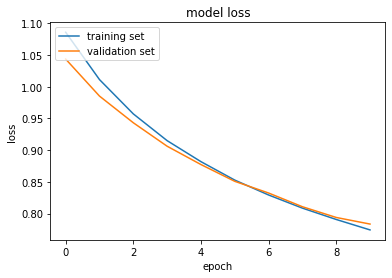

In [15]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [16]:
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)

In [17]:
y_test = test_generator.classes

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.34      0.34       123
           1       0.30      0.38      0.34       109
           2       0.45      0.35      0.40       124

    accuracy                           0.36       356
   macro avg       0.37      0.36      0.36       356
weighted avg       0.37      0.36      0.36       356



## AlexNet (sem pré-treinamento)

In [19]:
alex_model = Sequential([
    layers.experimental.preprocessing.Resizing(224,224,interpolation="bilinear",input_shape=(224,224,3)),
    Conv2D(kernel_size=(11, 11), filters=96, activation='relu', input_shape=dim, strides=(4,4)),
    MaxPooling2D(pool_size=(3,3), strides=2),
    BatchNormalization(),

    Conv2D(kernel_size=(5,5),filters=256, activation='relu', strides=(1,1)),
    MaxPooling2D(pool_size=(3,3), strides=2),
    BatchNormalization(),

    Conv2D(kernel_size=(3,3), filters=384, activation='relu', strides=(1,1)),
    Conv2D(kernel_size=(3,3), filters=384, activation='relu', strides=(1,1)),
    Conv2D(kernel_size=(3,3), filters=256, activation='relu', strides=(1,1)),
    MaxPooling2D(pool_size=(3,3), strides=2),
    Flatten(),
    
    Dense(units=4096,        activation='relu'),
    Dense(units=4096,        activation='relu'),
    Dense(units=num_classes, activation='softmax'),
])

In [20]:
alex_model.compile(optimizer=sgd, metrics=['accuracy'], loss='categorical_crossentropy')

history_fine = alex_model.fit(train_generator,
          epochs=25,
          batch_size=17,
          validation_data=valid_generator)

Epoch 1/25
74/74 [==============================] - 14s 163ms/step - loss: 1.0651 - accuracy: 0.4726 - val_loss: 1.0975 - val_accuracy: 0.4219
Epoch 2/25
74/74 [==============================] - 11s 155ms/step - loss: 1.0141 - accuracy: 0.6039 - val_loss: 1.0953 - val_accuracy: 0.5021
Epoch 3/25
74/74 [==============================] - 12s 156ms/step - loss: 0.9744 - accuracy: 0.5595 - val_loss: 1.0883 - val_accuracy: 0.5401
Epoch 4/25
74/74 [==============================] - 12s 162ms/step - loss: 0.9450 - accuracy: 0.5642 - val_loss: 1.0743 - val_accuracy: 0.5696
Epoch 5/25
74/74 [==============================] - 12s 168ms/step - loss: 0.9210 - accuracy: 0.5705 - val_loss: 1.0492 - val_accuracy: 0.5865
Epoch 6/25
74/74 [==============================] - 12s 156ms/step - loss: 0.8991 - accuracy: 0.5997 - val_loss: 1.0094 - val_accuracy: 0.6624
Epoch 7/25
74/74 [==============================] - 12s 156ms/step - loss: 0.8766 - accuracy: 0.6208 - val_loss: 0.9596 - val_accuracy: 0.7089

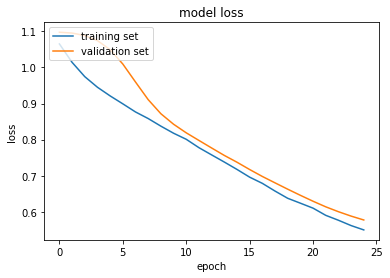

In [21]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [22]:
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)

In [23]:
y_test = test_generator.classes

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.37      0.36       123
           1       0.31      0.39      0.34       109
           2       0.39      0.31      0.34       124

    accuracy                           0.35       356
   macro avg       0.36      0.35      0.35       356
weighted avg       0.36      0.35      0.35       356



## ResNet50 (sem pré-treinamento)

In [31]:
resnet_model = ResNet50(input_shape=dim,
                  include_top=True,
                  weights=None, # <- Inicia os pesos da rede de forma aleatória
                  pooling='avg',
                  classes=num_classes)

In [ ]:
resnet_model.summary()

In [33]:
resnet_model.compile(optimizer=sgd, metrics=['accuracy'], loss='categorical_crossentropy')

history_fine = resnet_model.fit(train_generator,
          epochs=20,
          batch_size=17,
          validation_data=valid_generator)

Epoch 1/20
74/74 [==============================] - 41s 472ms/step - loss: 0.8223 - accuracy: 0.6195 - val_loss: 1.1087 - val_accuracy: 0.3671
Epoch 2/20
74/74 [==============================] - 34s 452ms/step - loss: 0.6224 - accuracy: 0.7614 - val_loss: 1.2637 - val_accuracy: 0.3671
Epoch 3/20
74/74 [==============================] - 33s 449ms/step - loss: 0.5878 - accuracy: 0.7715 - val_loss: 1.5679 - val_accuracy: 0.3671
Epoch 4/20
74/74 [==============================] - 34s 456ms/step - loss: 0.5706 - accuracy: 0.7749 - val_loss: 1.5749 - val_accuracy: 0.3671
Epoch 5/20
74/74 [==============================] - 33s 448ms/step - loss: 0.5624 - accuracy: 0.7846 - val_loss: 1.3183 - val_accuracy: 0.3671
Epoch 6/20
74/74 [==============================] - 33s 449ms/step - loss: 0.5523 - accuracy: 0.7876 - val_loss: 1.1730 - val_accuracy: 0.2363
Epoch 7/20
74/74 [==============================] - 33s 447ms/step - loss: 0.5411 - accuracy: 0.7905 - val_loss: 0.9428 - val_accuracy: 0.5865

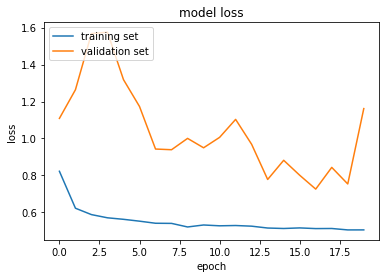

In [34]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [35]:
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)

In [36]:
y_test = test_generator.classes

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35       123
           1       0.32      0.39      0.35       109
           2       0.31      0.24      0.27       124

    accuracy                           0.33       356
   macro avg       0.32      0.33      0.32       356
weighted avg       0.33      0.33      0.32       356



As 3 f1-scores foram baixas, o que pode indicar over-fitting, ou under-fitting. Infelizmente, não consegui verificar qual o caso de cada uma a tempo.

# Extração de Caracteres dos Documentos

Abaixo, a extração dos caracteres das imagens é feita. Infelizmente, devido ao tempo, não consegui terminar a parte a tempo (a extração dos dados leva muito tempo, o que acabou impedindo a sua execução).

In [28]:
import pytesseract
from PIL import Image

In [ ]:
dict_texts = dict()

dfs = [df_train, df_test, df_valid]

path = 'documents'

for df in dfs:
  for i, doc_path in enumerate(df['filename']):
    full_path = f'{path}/{doc_path}'
    dict_texts[doc_path] = pytesseract.image_to_string(Image.open(full_path))

dict_texts

In [ ]:
df_text = pd.DataFrame(dict_texts, columns=['filename', 'Text'])

In [ ]:
df_text